# Exercise 1.6**. Using Principal Component Analysis as a special form of regression for predicting some data features from the others



In [1]:
pip install umap

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import datasets
import umap
import zipfile
from urllib.request import urlopen
import io
import time
from mpl_toolkits.mplot3d import Axes3D

# <a name="sec1">1. Use iris as example dataset or any other dataset</a>

Iris is a dataset composed of 150 samples each with 4 features.

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
names = iris['target_names']

In [4]:
print(X[:10])
print(X.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)


__Standardization of the data__

Standardization means changing variables' means to 0 and standard deviations to 1.

As explained [here](https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis) and on the [wikipedia's page](https://en.wikipedia.org/wiki/Principal_component_analysis), it is necessary to standardize data before performing PCA.
The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of our variables. So a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If we standardize the data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.

In [5]:
from sklearn.preprocessing import scale

In [6]:
X = scale(X)

In [7]:
print(X[:10])
print(np.mean(X, axis=0))
print(np.std(X, axis=0)) # Std=1 OK

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


# <a name="sec2">2. Use the standard implementation of PCA in scikit-learn in order to compute PCA of order k=1,2,3,4. </a>

https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

In [8]:
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
pca4 = PCA(n_components=4)

In [9]:
pca_1 = pca1.fit_transform(X) # Array shape (150,1)
pca_2 = pca2.fit_transform(X) # (150,2)
pca_3 = pca3.fit_transform(X) # (150,3)
pca_4 = pca4.fit_transform(X) # (150,4)

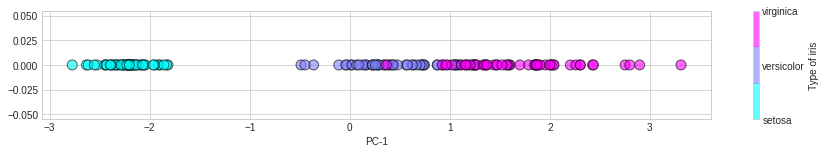

In [10]:
# PCA 1
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15, 2))
N = 3 # Number of labels
c_map = plt.cm.get_cmap('cool', N)
bounds = np.linspace(0,N,N+1)
scat = plt.scatter(pca_1[:, 0],np.zeros(X.shape[0]), cmap = c_map, edgecolor='k', s=100, c = Y, alpha=0.6)
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_ticklabels(names)
cb.set_label('Type of iris')
plt.xlabel('PC-1')
plt.show()

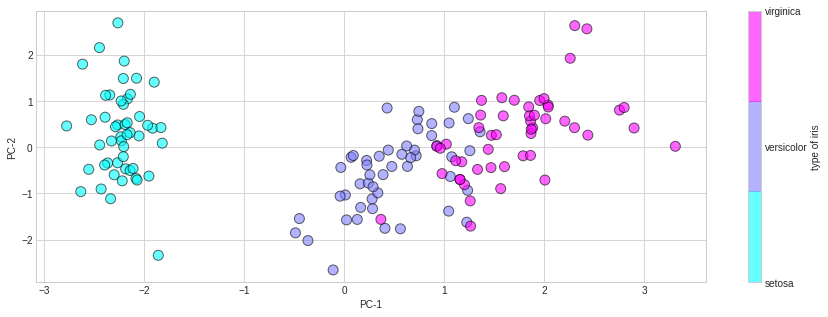

In [11]:
# PCA 2
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15, 5))
N = 3 # Number of labels
c_map = plt.cm.get_cmap('cool', N)
bounds = np.linspace(0,N,N+1)
scat = plt.scatter(pca_2[:, 0], pca_2[:, 1], cmap = c_map, edgecolor='k', s=100, c = Y, alpha=0.6)
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_ticklabels(names)
cb.set_label('type of iris')
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

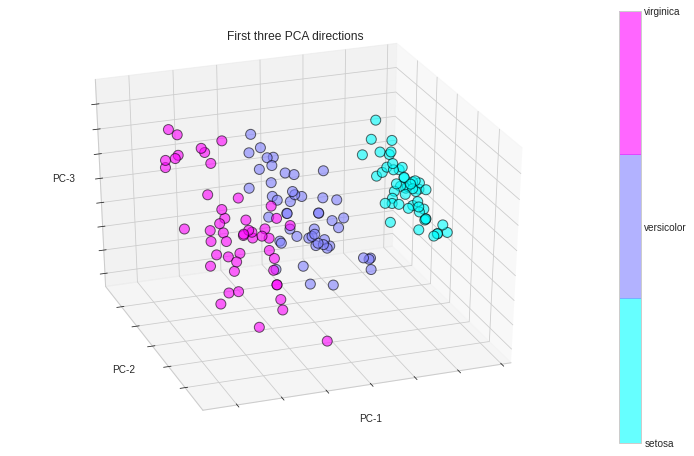

In [12]:
# PCA 3
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)

#V = pca3.components_
meanPoint = iris.data.mean(axis = 0)
#X_centered = iris.data - meanPoint
#print(np.mean(X_centered,axis=0))
c_map = plt.cm.get_cmap('cool', 3)
scatter = ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=Y, cmap=c_map, edgecolor='k', s=100, alpha=0.6)

cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
cb.set_ticklabels(names)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC-1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC-2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC-3")
ax.w_zaxis.set_ticklabels([])
plt.show()

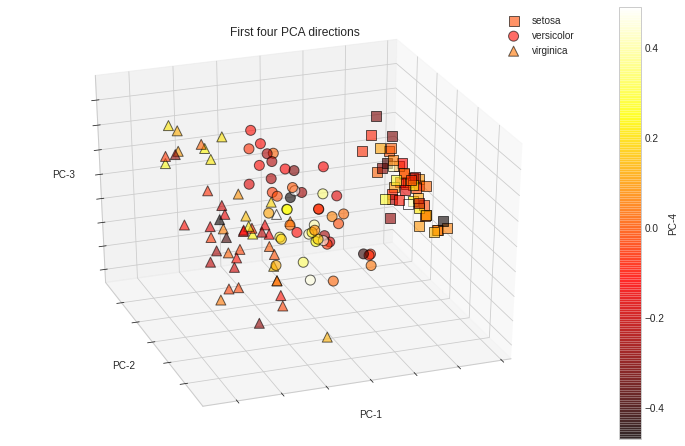

In [13]:
# PCA 4
# 4th component represented by the color
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)

meanPoint = iris.data.mean(axis = 0)
c_map = plt.cm.get_cmap('cool', 3)
img = ax.scatter(pca_4[:50, 0], pca_4[:50, 1], pca_4[:50, 2], c=pca_4[:50, 3],
           cmap=plt.hot(), edgecolor='k', s=100, alpha=0.6, marker='s', label='setosa')
ax.legend()
img = ax.scatter(pca_4[50:100, 0], pca_4[50:100, 1], pca_4[50:100, 2], c=pca_4[50:100, 3],
           cmap=plt.hot(), edgecolor='k', s=100, alpha=0.6, marker='o', label='versicolor')
ax.legend()
img = ax.scatter(pca_4[100:, 0], pca_4[100:, 1], pca_4[100:, 2], c=pca_4[100:, 3],
           cmap=plt.hot(), edgecolor='k', s=100, alpha=0.6, marker='^', label='virginica')
ax.legend()

cbar = fig.colorbar(img)
cbar.set_label('PC-4') 
ax.set_title("First four PCA directions")
ax.set_xlabel("PC-1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC-2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC-3")
ax.w_zaxis.set_ticklabels([])
plt.show()

# <a name="sec3">3. Predict one column out of four using three other columns and the computed principal components</a>


__4th column prediction from the first three columns__

Our input data is composed of the first three columns and the target data corresponds to the 4th column.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [15]:
iris = datasets.load_iris()
X = iris.data[:, :3] # First three columns
Y = iris.data[:, 3] # 4th column

In [16]:
print(X.shape, Y.shape)
print(X[0], Y[0])

(150, 3) (150,)
[5.1 3.5 1.4] 0.2


In [17]:
# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(112, 3) (38, 3) (112,) (38,)


### Principal Component Regression

- 3 columns ⟶ PCA ⟶ 1 column (1 component)
- Linear regression: we want to predict the 4th column from the first principal component

Our evaluation criteria will be the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$), which measures the quality of a linear regression. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.
We will also monitor the mean squared error (MSE).

PCR / PCA1
R² = 0.82, MSE = 0.11


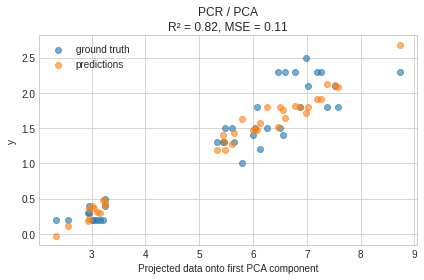

PCR / PCA2
R² = 0.84, MSE = 0.10
PCR / PCA3
R² = 0.94, MSE = 0.04
Explained variance: [0.66616519 0.31294403 0.02089078]


In [18]:
for i in range(1,4):
  pcr = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
  pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

  # Train
  pcr.fit(X_train, Y_train)

  # Predict
  pcr_pred = pcr.predict(X_test)

  # Compute score (R² and MSE)
  pcr_r2 = pcr.score(X_test, Y_test) # Gives coeff of determination
  pcr_mse = mean_squared_error(Y_test, pcr_pred)
  print(f"PCR / PCA{i}\nR² = {pcr_r2:.2f}, MSE = {pcr_mse:.2f}")

  if i ==1 :
    plt.scatter(pca.transform(X_test), Y_test, alpha=0.6, label="ground truth")
    plt.scatter(pca.transform(X_test), pcr.predict(X_test), alpha=0.6, label="predictions")
    plt.xlabel("Projected data onto first PCA component")
    plt.ylabel("y")
    plt.title(f"PCR / PCA\nR² = {pcr_r2:.2f}, MSE = {pcr_mse:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

  if i ==3 :
    print(f'Explained variance: {pca.explained_variance_ratio_}')

### Multiple Linear Regression

Comparison of the first result (3 columns reduced in 1 with PCA(1)) and the result without PCA (prediction using the 3 columns).

Here we perform linear regression without PCA. So we predict the 4th column directly from the first three features.


In [19]:
lr = LinearRegression()

In [20]:
# Train
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
Y_pred = lr.predict(X_test)
r2 = lr.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)

In [22]:
Y_pred

array([1.91448974, 2.01444551, 0.16066902, 1.4172433 , 1.21167863,
       2.34950134, 2.14283913, 2.035078  , 1.35429116, 2.32812998,
       0.16562611, 1.33260398, 1.97033228, 1.75373405, 1.49053325,
       1.24473646, 0.22680625, 0.03833032, 0.12009981, 2.05284093,
       0.31821779, 2.07952832, 0.24279718, 1.95752671, 2.10621572,
       1.58299921, 1.57019364, 0.51169422, 0.29188906, 0.14322162,
       1.62922155, 1.58264055, 1.67403053, 0.16528902, 1.46209542,
       1.11244017, 1.69858726, 0.3135978 ])

Below we plot the ground truth and the predictions from each feature.

In [23]:
print(f"R² = {r2:.2f}, MSE = {mse:.2f}")

R² = 0.94, MSE = 0.04


# <a name="sec4">4. Investigate how the prediction quality depends on k, and on the column. As a measure of quality prediction use mean squared error or any other suitable error measure</a>




In [24]:
def pca_quality(idx_col_pred, k_pca, data=iris.data):
    #print(f"----- PCA({k_pca}) - Pred col {idx_col_pred} -----")

    X = np.delete(data, obj=idx_col_pred, axis=1)
    Y = data[:, idx_col_pred]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    pcr = make_pipeline(StandardScaler(), PCA(n_components=k_pca), LinearRegression())
    pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

    # Train
    pcr.fit(X_train, Y_train)

    # Predict
    pcr_pred = pcr.predict(X_test)

    # Compute score (R² and MSE)
    pcr_r2 = pcr.score(X_test, Y_test) # Gives coeff of determination
    pcr_mse = mean_squared_error(Y_test, pcr_pred)

    return pcr_r2, pcr_mse

In [25]:
list_k_pca = [1,2,3]
list_idx_col_pred = [0,1,2,3]
results = []

for k_pca in list_k_pca:    
    print(f"----- PCA({k_pca}) -----")
    list_r2, list_mse = [], []
    for idx in list_idx_col_pred:
        pcr_r2, pcr_mse = pca_quality(idx, k_pca)
        print(f"\tCol {idx}: \tr2={pcr_r2:.6f}\tmse={pcr_mse:.6f}")
        list_r2.append(pcr_r2)
        list_mse.append(pcr_mse)
    results.append([list_r2, list_mse])

----- PCA(1) -----
	Col 0: 	r2=0.557778	mse=0.269878
	Col 1: 	r2=0.115909	mse=0.171773
	Col 2: 	r2=0.946190	mse=0.145309
	Col 3: 	r2=0.850437	mse=0.086690
----- PCA(2) -----
	Col 0: 	r2=0.707993	mse=0.185309
	Col 1: 	r2=0.281561	mse=0.124384
	Col 2: 	r2=0.979723	mse=0.070325
	Col 3: 	r2=0.873207	mse=0.067770
----- PCA(3) -----
	Col 0: 	r2=0.801911	mse=0.118178
	Col 1: 	r2=0.437700	mse=0.075622
	Col 2: 	r2=0.952419	mse=0.130034
	Col 3: 	r2=0.929944	mse=0.047227


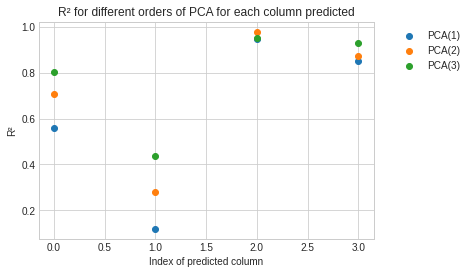

In [26]:
for k in list_k_pca:    
    plt.scatter(x=list_idx_col_pred, y=results[k-1][0], label=f"PCA({k})")
plt.xlabel("Index of predicted column")
plt.ylabel("R²")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('R² for different orders of PCA for each column predicted')
plt.show()

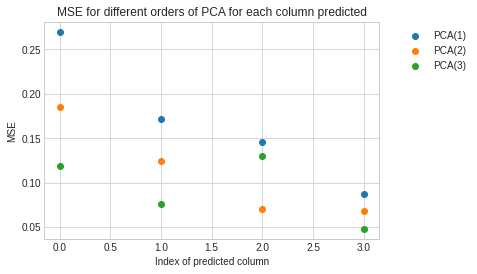

In [27]:
for k in list_k_pca:    
    plt.scatter(x=list_idx_col_pred, y=results[k-1][1], label=f"PCA({k})")
plt.xlabel("Index of predicted column")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('MSE for different orders of PCA for each column predicted')
plt.show()

Faire une petite anlyse conclusion sur la MSE et R2

# <a name="sec5">5. Predict two columns from the other two using PCA</a>

In [28]:
def avg(lst):
    return sum(lst) / len(lst)

In [29]:
def pca_quality(idx_col_pred, k_pca, data=iris.data):
    #print(f"----- PCA({k_pca}) - Pred col {idx_col_pred} -----")

    list_r2, list_mse = [], []
    X = np.delete(data, obj=idx_col_pred, axis=1) # Delete the columns we want to predict

    for idx in idx_col_pred:
        Y = data[:, idx_col_pred] # Use one column as the objective

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

        pcr = make_pipeline(StandardScaler(), PCA(n_components=k_pca), LinearRegression())
        pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        # Train
        pcr.fit(X_train, Y_train)

        # Predict
        pcr_pred = pcr.predict(X_test)

        # Compute score (R² and MSE)
        pcr_r2 = pcr.score(X_test, Y_test) # Gives coeff of determination
        pcr_mse = mean_squared_error(Y_test, pcr_pred)

        list_r2.append(pcr_r2)
        list_mse.append(pcr_mse)

    return list_r2, list_mse

In [30]:
from itertools import combinations
list_comb=[]
idx = np.arange(4) # Four possible columns to predict
comb = combinations(idx, 2)
for i in list(comb):
	list_comb.append(list(i))

In [31]:
list_comb

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

In [32]:
list_r2, list_mse = pca_quality(list_comb[0], 1) # 1st order PCA because we use 2 columns

In [33]:
print(list_r2, list_mse)

[0.40902014360614364, 0.48172866212621873] [0.19726885422564594, 0.15199785181246916]


In [34]:
r2=[]
mse=[]
for c in list_comb:
  print(f'---Prediction of columns {c} using the 2 other columns reduced in 1 with PCA(1)---')
  l_r2, l_mse = pca_quality(list_comb[0], 1)
  r2.append(l_r2)
  mse.append(l_mse)
  for i, idx in enumerate(c) :
    print(f'\t R² for col {idx} : {l_r2[i]}')
    print(f'\t mse for col {idx} : {l_mse[i]}')
  print('\n')
print(r2,mse)

---Prediction of columns [0, 1] using the 2 other columns reduced in 1 with PCA(1)---
	 R² for col 0 : 0.3190059339767796
	 mse for col 0 : 0.15443234379748416
	 R² for col 1 : 0.3627815753310441
	 mse for col 1 : 0.19775540053444474


---Prediction of columns [0, 2] using the 2 other columns reduced in 1 with PCA(1)---
	 R² for col 0 : 0.38746406321076726
	 mse for col 0 : 0.170081604407637
	 R² for col 2 : 0.42258068550058403
	 mse for col 2 : 0.18945290744300794


---Prediction of columns [0, 3] using the 2 other columns reduced in 1 with PCA(1)---
	 R² for col 0 : 0.45833589703263594
	 mse for col 0 : 0.19499119998104825
	 R² for col 3 : 0.405352684964448
	 mse for col 3 : 0.19566934288045013


---Prediction of columns [1, 2] using the 2 other columns reduced in 1 with PCA(1)---
	 R² for col 1 : 0.4060421520797529
	 mse for col 1 : 0.2159249236626928
	 R² for col 2 : 0.37715132424298436
	 mse for col 2 : 0.20865858277172994


---Prediction of columns [1, 3] using the 2 other column

# <a name="sec6">6. Split the dataset into the training and test parts, compute PCA of order k=1,2,3,4 on the training dataset and compute the test error. Check how the test error depend on the number of components k </a>


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
X = iris.data
Y = iris.target

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
def prediction(X, Y):
  acc_knn = []
  pred_knn = []
  acc_dt=[]
  pred_dt=[]
  pca = PCA(n_components=4)
  X_p = pca.fit_transform(X)
  X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y)
  print(X_train.shape, X_test.shape)
  for i in np.arange(1,5):
    X_train_pca = X_train[:,:i] #On prend les n premieres col selon la PCA voulue
    X_test_pca = X_test[:,:i] 
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X_train_pca, Y_train)
    y_pred_test = clf.predict(X_test_pca)
    acc_knn.append(accuracy_score(Y_test, y_pred_test))
    pred_knn.append(y_pred_test)

    clf = DecisionTreeClassifier()
    clf.fit(X_train_pca, Y_train)
    y_pred_test = clf.predict(X_test_pca)
    acc_dt.append(accuracy_score(Y_test, y_pred_test))
    pred_dt.append(y_pred_test)

  return X_train, X_test, Y_train, Y_test, acc_knn, pred_knn, acc_dt, pred_dt

In [46]:
X_train, X_test, Y_train, Y_test, acc_knn ,pred_knn, acc_dt, pred_dt = prediction(X,Y)

(112, 4) (38, 4)


In [47]:
#Affichage pour les 4 PCA

color = pd.Series(Y_test).map({0:'red',1:'blue',2:'green'})
p1_color = pd.Series(pred_knn[0]).map({0:'red',1:'blue',2:'green'})
p2_color = pd.Series(pred_knn[1]).map({0:'red',1:'blue',2:'green'})
p3_color = pd.Series(pred_knn[2]).map({0:'red',1:'blue',2:'green'})
p4_color = pd.Series(pred_knn[3]).map({0:'red',1:'blue',2:'green'})

p1_color_dt = pd.Series(pred_dt[0]).map({0:'lightcoral',1:'cornflowerblue',2:'springgreen'})
p2_color_dt = pd.Series(pred_dt[1]).map({0:'lightcoral',1:'cornflowerblue',2:'springgreen'})
p3_color_dt = pd.Series(pred_dt[2]).map({0:'lightcoral',1:'cornflowerblue',2:'springgreen'})
p4_color_dt = pd.Series(pred_dt[3]).map({0:'lightcoral',1:'cornflowerblue',2:'springgreen'})

Text(0, 0.5, 'Test accuracy')

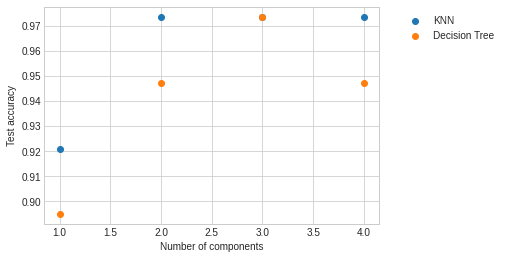

In [48]:
plt.scatter(x=np.arange(1, 5), y=acc_knn, label="KNN")
plt.scatter(x=np.arange(1, 5), y=acc_dt, label="Decision Tree")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")

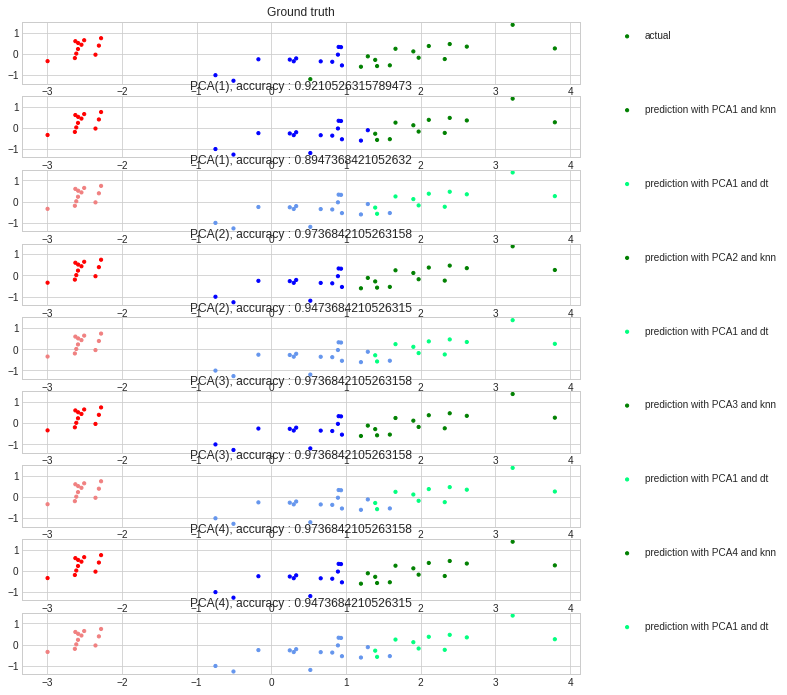

In [59]:
fig,(ax1,ax2,ax2_dt,ax3,ax3_dt, ax4,ax4_dt, ax5, ax5_dt)  = plt.subplots(nrows=9, figsize=(10,12))
ax1.scatter(X_test[:,0],X_test[:,1],c=color, label="actual",s=10)
ax2.scatter(X_test[:,0],X_test[:,1],c=p1_color, label="prediction with PCA1 and knn", s=10)
ax2_dt.scatter(X_test[:,0],X_test[:,1],c=p1_color_dt, label="prediction with PCA1 and dt", s=10)
ax3.scatter(X_test[:,0],X_test[:,1],c=p2_color, label="prediction with PCA2 and knn", s=10)
ax3_dt.scatter(X_test[:,0],X_test[:,1],c=p1_color_dt, label="prediction with PCA1 and dt", s=10)
ax4.scatter(X_test[:,0],X_test[:,1],c=p3_color, label="prediction with PCA3 and knn", s=10)
ax4_dt.scatter(X_test[:,0],X_test[:,1],c=p1_color_dt, label="prediction with PCA1 and dt", s=10)
ax5.scatter(X_test[:,0],X_test[:,1],c=p4_color, label="prediction with PCA4 and knn", s=10)
ax5_dt.scatter(X_test[:,0],X_test[:,1],c=p1_color_dt, label="prediction with PCA1 and dt", s=10)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title(f'Ground truth')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.set_title(f'PCA(1), accuracy : {acc_knn[0]}')
ax2_dt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2_dt.set_title(f'PCA(1), accuracy : {acc_dt[0]}')
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax3.set_title(f'PCA(2), accuracy : {acc_knn[1]}')
ax3_dt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax3_dt.set_title(f'PCA(2), accuracy : {acc_dt[1]}')
ax4.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax4.set_title(f'PCA(3), accuracy : {acc_knn[2]}')
ax4_dt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax4_dt.set_title(f'PCA(3), accuracy : {acc_dt[2]}')
ax5.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax5.set_title(f'PCA(4), accuracy : {acc_knn[3]}')
ax5_dt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax5_dt.set_title(f'PCA(4), accuracy : {acc_dt[3]}')
plt.show()